In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

<h3>Reading the data</h3>

In [2]:
outputs = pd.read_csv('mergedReddit.csv')
outputs.head()

,Title,Post Text,ID,Score,Total Comments,Post URL,Date,subredName
0,My husband and I are making a point and click ...,NaN,fz10ad,140,25,https://v.redd.it/w79dg7qkp5s41,2020-04-11 11:21:43,adventuregames
1,Me and my friends have been making this Point ...,NaN,gce20q,93,42,https://v.redd.it/zlr4wfl63fw41,2020-05-02 23:12:15,adventuregames
2,ScummVM and ResidualVM have been merged into a...,NaN,j8mcji,90,14,https://www.scummvm.org/news/20201009/,2020-10-10 17:25:47,adventuregames
3,After seeing this scene from an adventure game...,NaN,j2k89i,87,19,https://v.redd.it/ja5j33l0r9q51,2020-09-30 13:17:15,adventuregames
4,Westwood's 1997 Blade Runner is receiving a fu...,">Nightdive Studios, known for restoring classi...",fhv2vs,81,18,https://www.reddit.com/r/adventuregames/commen...,2020-03-13 07:05:03,adventuregames


In [3]:
outputs['subredName'].unique()


array(['adventuregames', 'pcgaming', 'videogamescience', 'disabledgamers',
       'remoteplay', 'truegaming', 'cloudgaming', 'NFTGames',
       'cloudygamer', 'mmo', 'gamingsuggestions', 'StrategyGames',
       'gameai', 'rpg', 'IndieGaming', 'gamestreaming', 'gaming',
       'cryptogames', 'newworldgame', 'accessiblegaming', 'Games'],
      dtype=object)

In [4]:
outputs['Title'].fillna('', inplace=True)
outputs['Title'] = outputs['Title'].apply(lambda x: x.lower())
outputs['Title']

0       my husband and i are making a point and click ...
1       me and my friends have been making this point ...
2       scummvm and residualvm have been merged into a...
3       after seeing this scene from an adventure game...
4       westwood's 1997 blade runner is receiving a fu...
                              ...                        
2537    ubisoft hosted for honor tournament ends in em...
2538                     starcraft ii going free to play!
2539    to play online co-op in a way out, only one pe...
2540    the original starcraft has been patched for th...
2541    "it's disturbing that wolfenstein can be consi...
Name: Title, Length: 2542, dtype: object

In [5]:
outputs['Post Text'].fillna('', inplace = True)
outputs['Post Text'] = outputs['Post Text'].apply(lambda x: x.lower())
outputs['Post Text']

0                                                        
1                                                        
2                                                        
3                                                        
4       >nightdive studios, known for restoring classi...
                              ...                        
2537    recently a for honor tournament was held to ce...
2538                                                     
2539                                                     
2540                                                     
2541                                                     
Name: Post Text, Length: 2542, dtype: object

<h3> Breaking the data by year </h3>

In [6]:
year2014 = outputs[outputs['Date'].str.contains('2014')]
year2016 = outputs[outputs['Date'].str.contains('2016')]
year2017 = outputs[outputs['Date'].str.contains('2017')]
year2018 = outputs[outputs['Date'].str.contains('2018')]
year2019 = outputs[outputs['Date'].str.contains('2019')]
year2020 = outputs[outputs['Date'].str.contains('2020')]
year2021 = outputs[outputs['Date'].str.contains('2021')]
year2022 = outputs[outputs['Date'].str.contains('2022')]
year2023 = outputs[outputs['Date'].str.contains('2023')]

In [7]:
textData2014 = pd.concat([year2014['Title'], year2014['Post Text']], ignore_index=True)
text_df2014 = pd.DataFrame(textData2014, columns=['CombinedColumn'])
text_df2014

textData2016 = pd.concat([year2016['Title'], year2016['Post Text']], ignore_index=True)
text_df2016 = pd.DataFrame(textData2016, columns=['CombinedColumn'])
text_df2016

textData2017 = pd.concat([year2017['Title'], year2017['Post Text']], ignore_index=True)
text_df2017 = pd.DataFrame(textData2017, columns=['CombinedColumn'])
text_df2017

textData2018 = pd.concat([year2018['Title'], year2018['Post Text']], ignore_index=True)
text_df2018 = pd.DataFrame(textData2018, columns=['CombinedColumn'])
text_df2018

textData2019 = pd.concat([year2019['Title'], year2019['Post Text']], ignore_index=True)
text_df2019 = pd.DataFrame(textData2019, columns=['CombinedColumn'])
text_df2019

textData2020 = pd.concat([year2020['Title'], year2020['Post Text']], ignore_index=True)
text_df2020 = pd.DataFrame(textData2020, columns=['CombinedColumn'])
text_df2020

textData2021 = pd.concat([year2021['Title'], year2021['Post Text']], ignore_index=True)
text_df2021 = pd.DataFrame(textData2021, columns=['CombinedColumn'])
text_df2021

textData2022 = pd.concat([year2022['Title'], year2022['Post Text']], ignore_index=True)
text_df2022 = pd.DataFrame(textData2022, columns=['CombinedColumn'])
text_df2022

textData2023 = pd.concat([year2023['Title'], year2023['Post Text']], ignore_index=True)
text_df2023 = pd.DataFrame(textData2023, columns=['CombinedColumn'])
text_df2023



,CombinedColumn
0,the ultimate remote play
1,so the remote play connected sign at the top o...
2,"chiaki with qt6, adaptive triggers/haptics sup..."
3,dualsense edge is now supported by apple devices!
4,diy project q
...,...
1693,this guy has designed a bunch of 3d-printable ...
1694,
1695,hi there– i'm a player researcher for a small ...
1696,hey! i hope this is the right place to post. o...


<h3> Data cleaning and processing </h3>

In [8]:
#converting all rows into one single string value
import string
import nltk 
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def cleanText(year_df):
    text= year_df['CombinedColumn']
    combined_text = ' '.join(map(str, text)) #converting list text to combined_text, a string
    cleaned_text = ''.join([char for char in combined_text if char not in string.punctuation]) #removing punctuations
    cleaned_text = cleaned_text.lower()
    return cleaned_text

<h3> Tokenization using NLP </h3>

In [9]:
nltk.download('punkt')
tokens2014 = nltk.word_tokenize(cleanText(text_df2014)) #tokening words in the string
tokens2016 = nltk.word_tokenize(cleanText(text_df2016)) #tokening words in the string
tokens2017 = nltk.word_tokenize(cleanText(text_df2017)) #tokening words in the string
tokens2018 = nltk.word_tokenize(cleanText(text_df2018)) #tokening words in the string
tokens2019 = nltk.word_tokenize(cleanText(text_df2019)) #tokening words in the string
tokens2020 = nltk.word_tokenize(cleanText(text_df2020)) #tokening words in the string
tokens2021 = nltk.word_tokenize(cleanText(text_df2021)) #tokening words in the string
tokens2022 = nltk.word_tokenize(cleanText(text_df2022)) #tokening words in the string
tokens2023 = nltk.word_tokenize(cleanText(text_df2023)) #tokening words in the string

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zaidfarooqui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
nltk.download('stopwords')
from nltk.corpus import stopwords

new_stop_words = ['like', 'time', 'would', 'im', '2', 'nan', 'games', 'game', '’', 'one', 'get', 'play', 'people', 'husband'] #can add more words to remove
stop_words = stopwords.words('english')

stop_words.extend(new_stop_words)

filtered_tokens14 = [word for word in tokens2014 if word not in stop_words] #remove stop words
filtered_tokens16 = [word for word in tokens2016 if word not in stop_words]
filtered_tokens17 = [word for word in tokens2017 if word not in stop_words]
filtered_tokens18 = [word for word in tokens2018 if word not in stop_words]
filtered_tokens19 = [word for word in tokens2019 if word not in stop_words]
filtered_tokens20 = [word for word in tokens2020 if word not in stop_words]
filtered_tokens21 = [word for word in tokens2021 if word not in stop_words]
filtered_tokens22 = [word for word in tokens2022 if word not in stop_words]
filtered_tokens23 = [word for word in tokens2023 if word not in stop_words]




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zaidfarooqui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from nltk.probability import FreqDist

fdist14 = FreqDist(filtered_tokens14)
fdist16 = FreqDist(filtered_tokens16)
fdist17 = FreqDist(filtered_tokens17)
fdist18 = FreqDist(filtered_tokens18)
fdist19 = FreqDist(filtered_tokens19)
fdist20 = FreqDist(filtered_tokens20)
fdist21 = FreqDist(filtered_tokens21)
fdist22 = FreqDist(filtered_tokens22)
fdist23 = FreqDist(filtered_tokens23)

# this is for calculating word frequency

<H3> Creating word clouds for year 2014 to 2023 </h3>

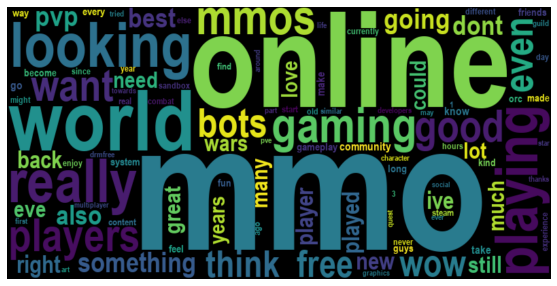

In [12]:
font_p = '/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf'

#creating wordcloud

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black', font_path=font_p).generate_from_frequencies(fdist14)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


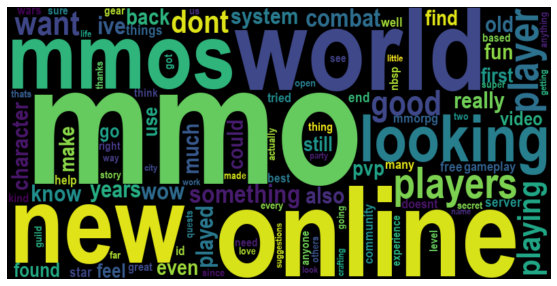

In [13]:
font_p = '/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf'

#creating wordcloud

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black', font_path=font_p).generate_from_frequencies(fdist16)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


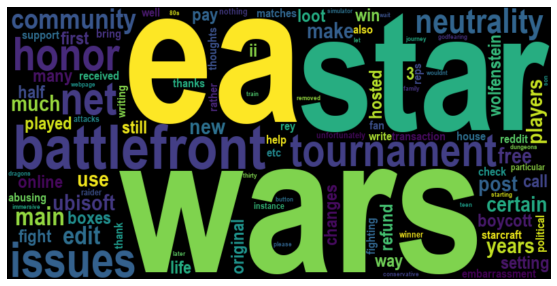

In [14]:
font_p = '/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf'

#creating wordcloud

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black', font_path=font_p).generate_from_frequencies(fdist17)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


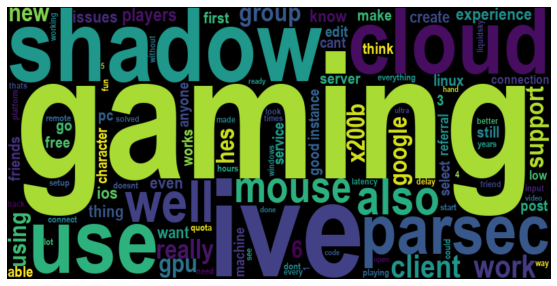

In [15]:
font_p = '/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf'

#creating wordcloud

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black', font_path=font_p).generate_from_frequencies(fdist18)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


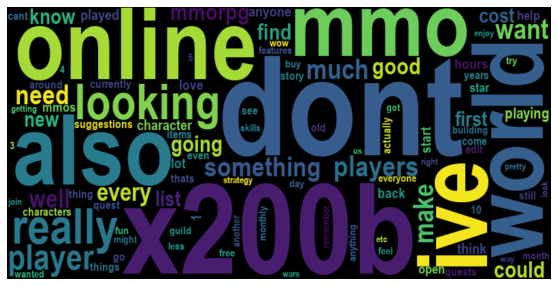

In [16]:
font_p = '/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf'

#creating wordcloud

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black', font_path=font_p).generate_from_frequencies(fdist19)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


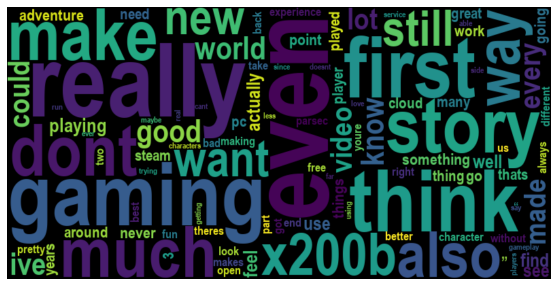

In [17]:
font_p = '/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf'

#creating wordcloud

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black', font_path=font_p).generate_from_frequencies(fdist20)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


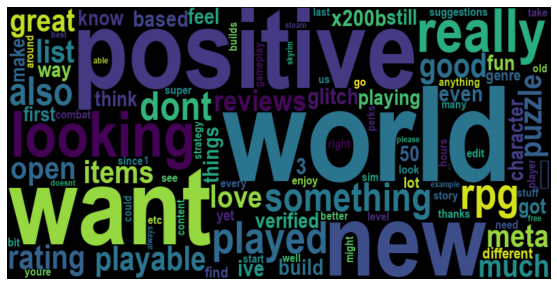

In [19]:
font_p = '/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf'

#creating wordcloud

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black', font_path=font_p).generate_from_frequencies(fdist22)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


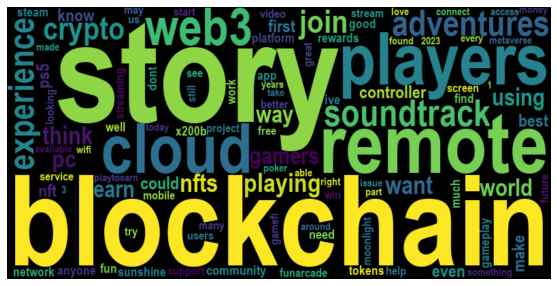

In [ ]:
font_p = '/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf'

#creating wordcloud

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black', font_path=font_p).generate_from_frequencies(fdist23)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<h3> Additional parts done for analysis phrases </h3>

In [21]:
filtered_tokens_phrases = filtered_tokens20

useless_list_phrases = ["x200b", "x200b" , "ti", "x200b" ,"x200b" ,"x200b"]
filtered_tokens_phrases = [item for item in filtered_tokens_phrases if item not in useless_list_phrases]

In [22]:
#combining words to form phrases and check for weak signals

from nltk.util import ngrams
n = 2 #phrase of 3 words
phrases = list(ngrams(filtered_tokens_phrases, n))
phrase_list = [' '.join(phrase) for phrase in phrases]
phrase_freq = nltk.FreqDist(phrase_list)
common_phrases = phrase_freq.most_common() 

# for phrase, frequency in common_phrases:
#     print(f'Phrase: "{phrase}", Frequency: {frequency}')

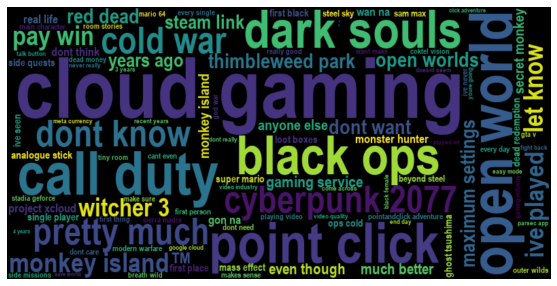

In [23]:
font_p = '/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf'

#creating wordcloud

wordcloud = WordCloud(width=800, height=400, max_words=100, font_path=font_p).generate_from_frequencies(phrase_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()